In [103]:
import numpy as np

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [105]:
df= pd.read_csv(r"/Users/ashishtripathi/Desktop/data.csv")

In [106]:
df['X_Squared_Value'] = df['X_Value']**2
df['X_Cubed_Value'] = df['X_Value']**3
df['X_Quad_Value'] = df['X_Value']**4
df['XY_Value'] = df['X_Value'] * df['Y_Values']
df['X_Squared_Y_Value'] = df['X_Squared_Value'] * df['Y_Values']
df['X_Value_log_base_10']= np.log10(df['X_Value'])
df['Y_Value_log_base_10']= np.log10(df['Y_Values'])

In [107]:
df.head(10)


,X_Value,Y_Values,X_Squared_Value,X_Cubed_Value,X_Quad_Value,XY_Value,X_Squared_Y_Value,X_Value_log_base_10,Y_Value_log_base_10
0,1,7.50,1,1,1,7.50,7.50,0.000000,0.875061
1,2,44.31,4,8,16,88.62,177.24,0.301030,1.646502
2,3,60.80,9,27,81,182.40,547.20,0.477121,1.783904
3,4,148.97,16,64,256,595.88,2383.52,0.602060,2.173099
4,5,225.50,25,125,625,1127.50,5637.50,0.698970,2.353147
5,6,262.64,36,216,1296,1575.84,9455.04,0.778151,2.419361
6,7,289.06,49,343,2401,2023.42,14163.94,0.845098,2.460988
7,8,451.53,64,512,4096,3612.24,28897.92,0.903090,2.654687
8,9,439.62,81,729,6561,3956.58,35609.22,0.954243,2.643077
9,10,698.88,100,1000,10000,6988.80,69888.00,1.000000,2.844403


# Simple Linear Regression

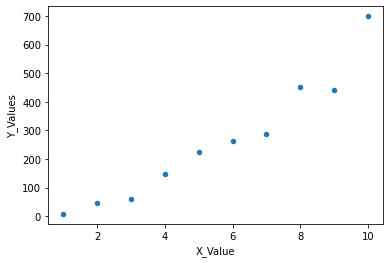

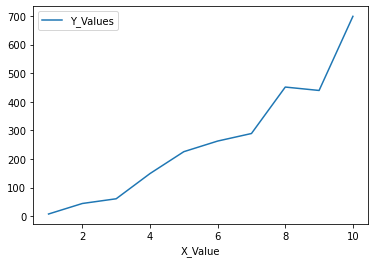

In [108]:
scatter_plot=df.plot.scatter(x='X_Value',y='Y_Values')
line_plot=df.plot.line(x='X_Value',y='Y_Values')

In [109]:
#calculate mean
def mean (values):
    return sum(values)/ float(len(values))

In [110]:
#calculate variance
def variance (values, mean):
    return sum([(val-mean)**2 for val in values])

In [111]:
#calculate covariance between x and y values
def covariance (X_Value, mean_X, Y_Values, mean_Y):
    covariance=0.0
    for r in range(len(X_Value)):
        covariance= covariance + (X_Value[r]-mean_X) * (Y_Values[r]-mean_Y)
    return covariance

In [115]:
#calculating coefficients
def coefficient (mean_X, mean_Y, covariance_X_Y, variance_X):
    B1 = covariance_X_Y/variance_X
    B0 = mean_Y - B1 * mean_X
    return B0,B1
B0,B1= coefficient(mean_X, mean_Y, covariance_X_Y, variance_X)
B0,B1

(-117.14066666666668, 69.09484848484848)

In [118]:
#setup ANOVA table
def anova_table(Y_Values , mean_Y):
    df_anova = pd.DataFrame(columns=['DoF', 'SS', 'MS'], index=['Reg', 'Error', 'Total'])
    # for simple linear regression df reg = 1 (k for k predictors for polynomial)
    df_anova['DoF']['Reg'] = 1
    # for simple linear regression df error = n - 2 where n = number of samples
    df_anova['DoF']['Error'] = df.shape[0] - 2
    df_anova['DoF']['Total'] = df_anova['DoF']['Reg'] + df_anova['DoF']['Error']
    mean_Y = mean(df['Y_Values'])
    for r in range(len(df['Y_Values'])):
        ss_regression=sum((df['Y_Lin_Pred'] - mean_Y)**2)
        ss_error=sum((df['Y_Values']-df['Y_Lin_Pred'])**2)
        ss_total=sum((df['Y_Values']-mean_Y)**2)

    df_anova['SS']['Reg'] = ss_regression
    df_anova['SS']['Error'] = ss_error
    df_anova['SS']['Total'] = df_anova['SS']['Reg'] + df_anova['SS']['Error']
    df_anova['MS'] = df_anova['SS'] / df_anova['DoF']
    df_anova
    f_score = df_anova['MS']['Reg'] / df_anova['MS']['Error']
    return df_anova, f_score


In [119]:
linear_reg_anova= anova_table(df['Y_Values'], mean_Y)
linear_reg_anova

(      DoF             SS             MS
 Reg     1  393863.092189  393863.092189
 Error   8   31945.076101    3993.134513
 Total   9   425808.16829   47312.018699,
 98.63506750122829)

In [112]:
mean_X, mean_Y = mean(df['X_Value']), mean(df['Y_Values'])
mean_X,mean_Y

(5.5, 262.881)

In [113]:
variance_X,variance_Y = variance(df['X_Value'],mean_X),variance(df['Y_Values'],mean_Y)
variance_X,variance_Y

(82.5, 425808.16828999994)

In [114]:
covariance_X_Y = covariance(df['X_Value'], mean_X, df['Y_Values'],mean_Y)
covariance_X_Y

5700.325

In [116]:
c,m= coefficient(mean_X, mean_Y, covariance_X_Y, variance_X)
c, m

(-117.14066666666668, 69.09484848484848)

0.9249777752528935

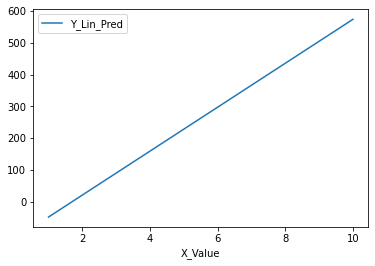

In [117]:
df['Y_Lin_Pred'] = m * df['X_Value'] + c
line_plot=df.plot.line(x='X_Value',y='Y_Lin_Pred')
correl_matrix= np.corrcoef(df['Y_Values'], df['Y_Lin_Pred'])
corr=correl_matrix[0,1]
R_sq=corr**2
R_sq

# Quadratic Linear Regression

In [120]:
mean_X_Squared, mean_XY, mean_X_Squared_Y = mean(df['X_Squared_Value']), mean(df['XY_Value']), mean(df['X_Squared_Y_Value'])
mean_X_Squared, mean_XY, mean_X_Squared_Y

(38.5, 2015.878, 16676.708000000002)

In [121]:
sum_N, sum_X, sum_X_Squared, sum_X_Cubed, sum_X_Quad = 10, sum(df['X_Value']), sum(df['X_Squared_Value']), sum(df['X_Cubed_Value']), sum(df['X_Quad_Value'])
sum_N, sum_X, sum_X_Squared, sum_X_Cubed, sum_X_Quad

(10, 55, 385, 3025, 25333)

In [122]:
# Equation of form AX = B => X = inv(A).B
m_list = [[sum_X_Squared, sum_X, sum_N], [sum_X_Cubed, sum_X_Squared, sum_X], [sum_X_Quad, sum_X_Cubed, sum_X_Squared]]
A = np.array(m_list)

B = np.array([mean_Y*10, mean_XY*10, mean_X_Squared_Y*10])
X = np.linalg.inv(A).dot(B)
X

array([5.40590909, 9.62984848, 1.78933333])

In [123]:
df['Y_Quad_Pred'] = X[0] * df['X_Squared_Value'] + X[1] * df['X_Value'] + X[2]

0.9612152070013958

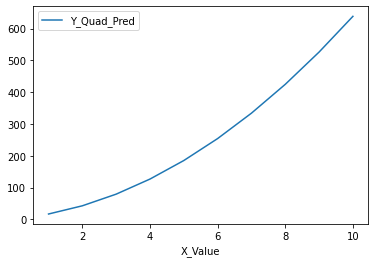

In [124]:
line_plot=df.plot.line(x='X_Value',y='Y_Quad_Pred')
correl_matrix= np.corrcoef(df['Y_Values'], df['Y_Quad_Pred'])
corr=correl_matrix[0,1]
R_sq=corr**2
R_sq

In [130]:
def anova_table_quad(Y_Values , mean_Y):
    df_anova = pd.DataFrame(columns=['DoF', 'SS', 'MS'], index=['Reg', 'Error', 'Total'])
    # for simple linear regression df reg = 1 (k for k predictors for polynomial)
    df_anova['DoF']['Reg'] = 1
    # for simple linear regression df error = n - 2 where n = number of samples
    df_anova['DoF']['Error'] = df.shape[0] - 2
    df_anova['DoF']['Total'] = df_anova['DoF']['Reg'] + df_anova['DoF']['Error']
    mean_Y = mean(df['Y_Values'])
    for r in range(len(df['Y_Values'])):
        ss_regression=sum((df['Y_Quad_Pred'] - mean_Y)**2)
        ss_error=sum((df['Y_Values']-df['Y_Quad_Pred'])**2)
        ss_total=sum((df['Y_Values']-mean_Y)**2)

    df_anova['SS']['Reg'] = ss_regression
    df_anova['SS']['Error'] = ss_error
    df_anova['SS']['Total'] = df_anova['SS']['Reg'] + df_anova['SS']['Error']
    df_anova['MS'] = df_anova['SS'] / df_anova['DoF']
    df_anova
    f_score = df_anova['MS']['Reg'] / df_anova['MS']['Error']
    return df_anova, f_score



In [131]:
Quad_reg_anova= anova_table_quad(df['Y_Values'], mean_Y)
Quad_reg_anova

(      DoF             SS             MS
 Reg     1  409293.286626  409293.286626
 Error   8   16514.881664    2064.360208
 Total   9   425808.16829   47312.018699,
 198.26640962832175)

# log-log transformed linear regression

In [132]:
mean_log_X, mean_log_Y= mean(df['X_Value_log_base_10']),mean(df['Y_Value_log_base_10'])
mean_log_X, mean_log_Y

(0.6559763032876794, 2.185422748948237)

In [133]:
variance_log_X,variance_log_Y = variance(df['X_Value_log_base_10'],mean_log_X),variance(df['Y_Value_log_base_10'],mean_log_Y)
variance_log_X,variance_log_Y

(0.912110302500082, 3.1915579620952137)

In [134]:
covariance_log_X_log_Y = covariance(df['X_Value_log_base_10'], mean_log_X, df['Y_Value_log_base_10'],mean_log_Y)
covariance_X_Y

5700.325

0.9605267390568574

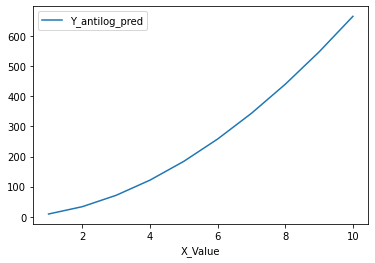

In [137]:
c_log,m_log= coefficient(mean_log_X, mean_log_Y, covariance_log_X_log_Y, variance_log_X)
c_log,m_log
df['Y_log_Pred'] = m_log * df['X_Value_log_base_10'] + c_log
df['Y_antilog_pred']= 10.0**(df['Y_log_Pred'])
df['Y_antilog_pred']
line_plot=df.plot.line(x='X_Value',y='Y_antilog_pred')
correl_matrix= np.corrcoef(df['Y_Values'], df['Y_antilog_pred'])
corr=correl_matrix[0,1]
R_sq=corr**2
R_sq




In [139]:
#setup ANOVA table
def anova_table_log_transform(Y_Values , mean_Y):
    df_anova = pd.DataFrame(columns=['DoF', 'SS', 'MS'], index=['Reg', 'Error', 'Total'])
    # for simple linear regression df reg = 1 (k for k predictors for polynomial)
    df_anova['DoF']['Reg'] = 1
    # for simple linear regression df error = n - 2 where n = number of samples
    df_anova['DoF']['Error'] = df.shape[0] - 2
    df_anova['DoF']['Total'] = df_anova['DoF']['Reg'] + df_anova['DoF']['Error']
    mean_Y = mean(df['Y_Values'])
    for r in range(len(df['Y_Values'])):
        ss_regression=sum((df['Y_antilog_pred'] - mean_Y)**2)
        ss_error=sum((df['Y_Values']-df['Y_antilog_pred'])**2)
        ss_total=sum((df['Y_Values']-mean_Y)**2)

    df_anova['SS']['Reg'] = ss_regression
    df_anova['SS']['Error'] = ss_error
    df_anova['SS']['Total'] = df_anova['SS']['Reg'] + df_anova['SS']['Error']
    df_anova['MS'] = df_anova['SS'] / df_anova['DoF']
    df_anova
    f_score = df_anova['MS']['Reg'] / df_anova['MS']['Error']
    return df_anova, f_score



In [140]:
log_transform_reg_anova= anova_table_log_transform(df['Y_Values'], mean_Y)
log_transform_reg_anova

(      DoF             SS            MS
 Reg     1   460249.08521  460249.08521
 Error   8   18516.577528   2314.572191
 Total   9  478765.662738  53196.184749,
 198.8484468152159)

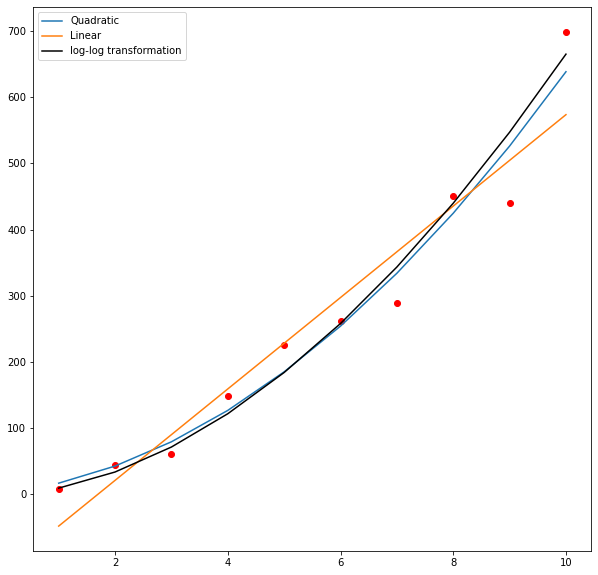

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df['X_Value'], df['Y_Values'], c='red')
plt.plot(df['X_Value'], df['Y_Quad_Pred'], label = "Quadratic")
plt.plot(df['X_Value'], df['Y_Lin_Pred'], label = "Linear")
plt.plot(df['X_Value'], df['Y_antilog_pred'], c='black', label = "log-log transformation")


plt.gca()
plt.legend()
plt.show()



For the given dataset log-log transformed regression is more accurate based on the R-sqrd value.